In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start_date = '2012-01-01'
end_date = '2021-10-28'

df = data.DataReader('AAPL','yahoo', start_date, end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591937
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659610
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800156
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913446


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-22,150.179993,148.639999,149.690002,148.690002,58883400.0,148.473312
2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.423386
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.102402
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.633087
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.347656


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591937
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659610
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800156
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913446


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0


In [6]:
df

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0
...,...,...,...,...,...
2468,150.179993,148.639999,149.690002,148.690002,58883400.0
2469,149.369995,147.619995,148.679993,148.639999,50720600.0
2470,150.839996,149.009995,149.330002,149.320007,60893400.0
2471,149.729996,148.490005,149.360001,148.850006,56094900.0


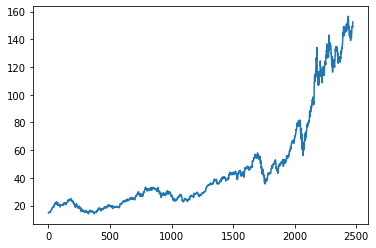

In [7]:
plt.plot(df['Close'])

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2468    143.3968
2469    143.6478
2470    143.8821
2471    144.1116
2472    144.3699
Name: Close, Length: 2473, dtype: float64

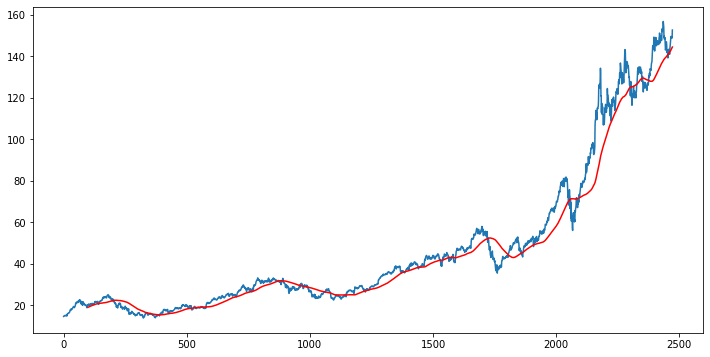

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100,'r' )

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2468    136.02335
2469    136.10630
2470    136.20800
2471    136.30825
2472    136.41665
Name: Close, Length: 2473, dtype: float64

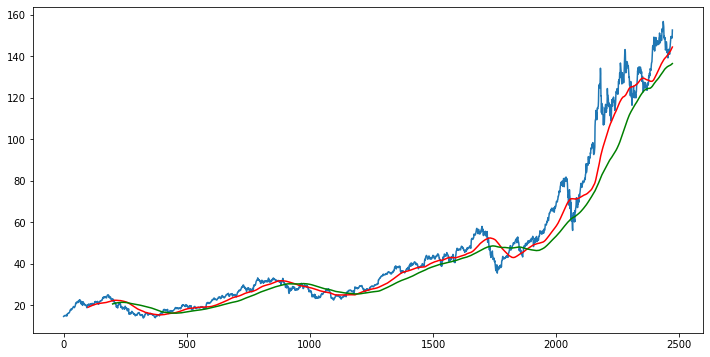

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100,'r' )
plt.plot(ma200, 'g')

In [12]:
df.shape

(2473, 5)

In [13]:
#splitting data into into training and testing 70 % and 30%

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(1731, 1)
(742, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.77399586],
       [0.74319263],
       [0.76934421]])

In [31]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train.shape

(1631, 100, 1)

In [33]:
#ML Model

from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))
          
model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))
          
          
model.add(Dense(units =1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [35]:
model.compile(optimizer ='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
51/51 [==============================] - 25s 356ms/step - loss: 0.0280
Epoch 2/50
51/51 [==============================] - 17s 336ms/step - loss: 0.0066
Epoch 3/50
51/51 [==============================] - 17s 333ms/step - loss: 0.0061
Epoch 4/50
51/51 [==============================] - 17s 337ms/step - loss: 0.0053
Epoch 5/50
51/51 [==============================] - 17s 331ms/step - loss: 0.0057
Epoch 6/50
51/51 [==============================] - 17s 325ms/step - loss: 0.0051
Epoch 7/50
51/51 [==============================] - 17s 328ms/step - loss: 0.0051
Epoch 8/50
51/51 [==============================] - 17s 343ms/step - loss: 0.0049
Epoch 9/50
51/51 [==============================] - 17s 336ms/step - loss: 0.0045
Epoch 10/50
51/51 [==============================] - 17s 341ms/step - loss: 0.0049
Epoch 11/50
51/51 [==============================] - 18s 347ms/step - loss: 0.0040
Epoch 12/50
51/51 [==============================] - 16s 312ms/step - loss: 0.0038
Epoch 13/50
5

In [36]:
model.save('keras_model.h5')

In [37]:
data_testing.head()

,Close
1731,48.382500
1732,46.465000
1733,44.244999
1734,44.195000
1735,43.072498


In [41]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

,Close
0,46.040001
1,46.375000
2,46.277500
3,46.794998
4,45.980000


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08661287],
       [0.08937821],
       [0.08857337],
       [0.09284518],
       [0.08611758],
       [0.08917182],
       [0.09447551],
       [0.09986173],
       [0.09938709],
       [0.09428979],
       [0.10079038],
       [0.10140949],
       [0.10054275],
       [0.10165713],
       [0.09949025],
       [0.10254453],
       [0.1016365 ],
       [0.10198732],
       [0.10485584],
       [0.10861177],
       [0.10735292],
       [0.10068719],
       [0.09847906],
       [0.09926324],
       [0.12239717],
       [0.13455228],
       [0.1357905 ],
       [0.13801928],
       [0.13397445],
       [0.13426336],
       [0.13762718],
       [0.13484119],
       [0.13760652],
       [0.13942257],
       [0.14043379],
       [0.14678995],
       [0.15558123],
       [0.15120623],
       [0.15033946],
       [0.15036011],
       [0.15126814],
       [0.1526508 ],
       [0.15632416],
       [0.15995624],
       [0.16672512],
       [0.17095568],
       [0.17632128],
       [0.177

In [45]:
input_data.shape

(842, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(742, 100, 1)
(742,)


In [52]:
# making prdictions

y_predicted = model.predict(x_test)
y_predicted.shape

(742, 1)

In [54]:
y_test

array([0.1059496 , 0.09012113, 0.0717956 , 0.07138287, 0.06211691,
       0.0669253 , 0.06614112, 0.07996781, 0.07709928, 0.07509751,
       0.08797491, 0.07119714, 0.06713168, 0.05427493, 0.05656562,
       0.05456384, 0.05553378, 0.05935158, 0.04806322, 0.04488516,
       0.04928081, 0.03859091, 0.03021235, 0.01762386, 0.0095755 ,
       0.030914  , 0.02880903, 0.02897413, 0.03209031, 0.03246176,
       0.        , 0.01252655, 0.01184553, 0.01766514, 0.02294817,
       0.02395939, 0.0208432 , 0.01611738, 0.02245291, 0.02631199,
       0.02821057, 0.03019173, 0.02292754, 0.02420702, 0.02168932,
       0.03213156, 0.0291186 , 0.02577541, 0.04758858, 0.05004437,
       0.05020947, 0.05997069, 0.06601727, 0.06614112, 0.05933095,
       0.0582372 , 0.05621477, 0.05922776, 0.05776253, 0.05904204,
       0.05825783, 0.0593103 , 0.06158036, 0.05957858, 0.06352023,
       0.06612046, 0.06632684, 0.06744122, 0.06389168, 0.0676476 ,
       0.06946365, 0.06880326, 0.06671895, 0.0625503 , 0.06339

In [56]:
y_predicted

array([[0.14567843],
       [0.14269677],
       [0.1395103 ],
       [0.13611639],
       [0.13249218],
       [0.12864101],
       [0.12460664],
       [0.1204474 ],
       [0.11629009],
       [0.11226821],
       [0.10849106],
       [0.10508412],
       [0.10208635],
       [0.0994738 ],
       [0.09715605],
       [0.0950423 ],
       [0.09305832],
       [0.09115799],
       [0.08933425],
       [0.08756912],
       [0.0858442 ],
       [0.08415952],
       [0.08251342],
       [0.08090283],
       [0.07932819],
       [0.07779449],
       [0.07631707],
       [0.07491536],
       [0.07360786],
       [0.07241014],
       [0.07133299],
       [0.07037362],
       [0.06952471],
       [0.06877828],
       [0.06812716],
       [0.06756601],
       [0.06708989],
       [0.06669246],
       [0.06636509],
       [0.0660997 ],
       [0.06588988],
       [0.06573012],
       [0.06561555],
       [0.0655396 ],
       [0.06549491],
       [0.06547412],
       [0.06547259],
       [0.065

In [58]:
scaler.scale_

array([0.00825474])

In [60]:
scale_factor = 1/0.00825474
y_predicted = y_predicted*scale_factor
y_test = y_test *scale_factor

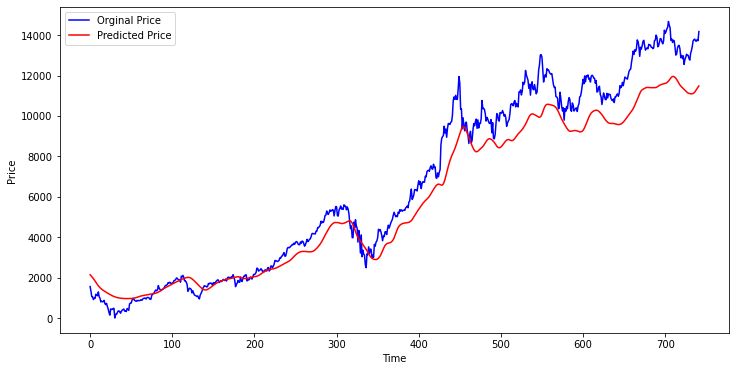

In [61]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Orginal Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()